# **Exercise 3** Two-qubit-gates, entanglement and oracles

## Necessary preparation

For exercise 3.1 we need to upgrade preinstalled versions of qiskit and qiskit-ibm-provider libraries. Run the following cell to upgrade.

In [1]:
%pip install --upgrade qiskit
%pip install --upgrade qiskit-ibmq-provider

Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.


## Exercise 3.1 - On a real quantum device

Run the circuit of exercise 2.5 on IBM's Q System One. Follow the following steps:
1. Create an account for [IBM Quantum Experience](https://quantum-computing.ibm.com).
2. Copy the API token from [Account settings](https://quantum-computing.ibm.com/account).
3. Paste the API token into the code below.
4. Modify the chosen backend in the code below.
5. Run the cell.
6. Follow your job on [Compute resources](https://quantum-computing.ibm.com/services/resources) by opening the chosen backend.

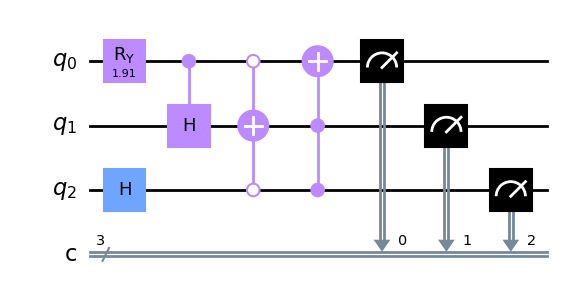

C:\Users\mar69860\AppData\Local\Temp\ipykernel_2540\2030365347.py:19: DeprecationWarning: The package qiskit.providers.ibmq is being deprecated. Please see https://ibm.biz/provider_migration_guide to get instructions on how to migrate to qiskit-ibm-provider (https://github.com/Qiskit/qiskit-ibm-provider) and qiskit-ibm-runtime (https://github.com/Qiskit/qiskit-ibm-runtime).
  IBMQ.save_account('MY_API_TOKEN')
C:\Users\mar69860\AppData\Local\Temp\ipykernel_2540\2030365347.py:19: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  IBMQ.save_account('MY_API_TOKEN')
configrc.store_credentials:WARNING:2023-05-15 11:31:01,909: Credentials

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_jakarta') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_lagos') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_nairo

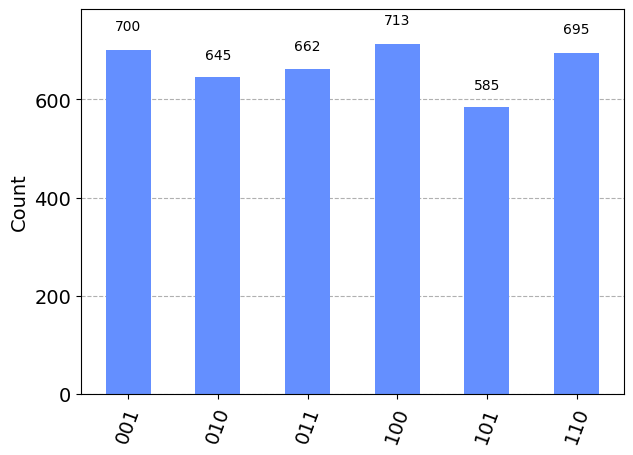

In [2]:
from qiskit import IBMQ
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit.compiler import transpile
from qiskit.circuit.library import XGate
import math

qc = QuantumCircuit(3,3)
qc.ry(2*math.acos(1/math.sqrt(3)), 0)
qc.ch(0,1)
qc.h(2)
qc.ccx(0,2,1,'00')
qc.ccx(1,2,0,'11')
qc.measure([0,1,2],[0,1,2])
display(qc.draw(output="mpl"))

# Replace parameter 'MY_API_TOKEN' by your API token. Keep quotation marks to feed a string. 
IBMQ.save_account('MY_API_TOKEN')
IBMQ.load_account()
provider = IBMQ.get_provider()

display(provider.backends())

# replace the simulator backend by real quantum computer from listed backends
# you might choose a less used backend from https://quantum-computing.ibm.com/services/resources
backend = provider.get_backend('ibmq_qasm_simulator')
job = backend.run(transpile(qc, backend))
result = job.result()
counts = result.get_counts()

display(plot_histogram(counts))

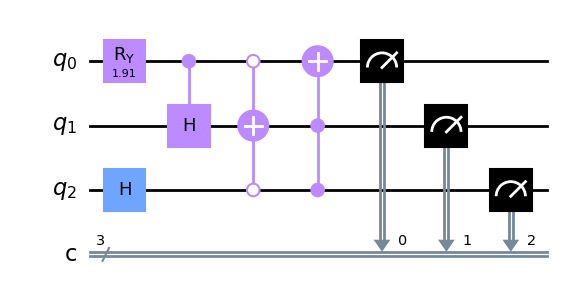

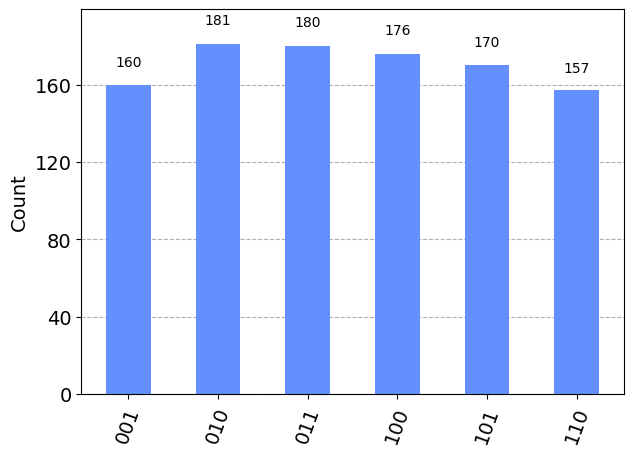

In [3]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit.compiler import transpile
from qiskit.circuit.library import XGate
import math

qc = QuantumCircuit(3,3)
qc.ry(2*math.acos(1/math.sqrt(3)), 0)
qc.ch(0,1)
qc.h(2)
qc.ccx(0,2,1,'00')
qc.ccx(1,2,0,'11')
qc.measure([0,1,2],[0,1,2])
display(qc.draw(output="mpl"))

backend = AerSimulator(shots=1024)
job = backend.run(transpile(qc, backend))
result = job.result()
counts = result.get_counts()

display(plot_histogram(counts))

## Exercise 3.2 - CNOT gate

1. Describe the behavior of the CNOT gate (aka CX gate).
2. Play around with the following quantum circuit. What is it doing? Why is it important?

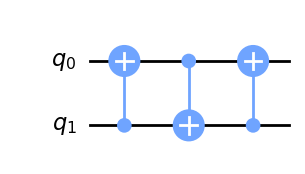

In [4]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

qc = QuantumCircuit(2)
qc.cx(1,0)
qc.cx(0,1)
qc.cx(1,0)
display(qc.draw(output='mpl'))

## Exercise 3.3 - Schrödinger's cats

[![](xkcd-45.jpg)](https://xkcd.com/45/) <small>©[xkcd](https://xkcd.com)</small>

You are in the quantum pet shop, located somewhere in superposition of Louisenstraße and Alaunstraße, Dresden-Neustadt. You are going to buy two of [Schrödinger's cats](https://en.wikipedia.org/wiki/Schr%C3%B6dinger%27s_cat). The salesperson offers you two bundles, each consisting of two boxes. Each box hosts a Schrödinger's cat, which is in superposition of $\lvert0\rangle:=\text{'dead'},\,\lvert1\rangle:=\text{'alive'}\,$. The exact composite quantum state of a bundle's cats is given by the parameterized circuit below (initialized by $\lvert 00\rangle$).

* Bundle 'a' uses parameter values $\varphi=\pi/2,\,\theta=0\,$,
* Bundle 'b' uses parameter values $\varphi=0,\,\theta=\pi/2\,$.

Each box contains a quantum chip and a control panel. Hence, after the purchase you can apply arbitrary single-qubit-gates to the cat inside, modifying the quantum state accordingly. The selection of a bundle and programming the purchased boxes is up to you.

1. Experiment with the circuit below and discuss for both bundles what you can achieve after programming and opening the boxes. What is possible in the worst case, what is possible in the average case?
2. Complete the circuit by incorporting the bundle choice, box programs and measurement (opening the boxes). Can you ensure against all odds, that this will let you obtain two alive and therefore happy cats?

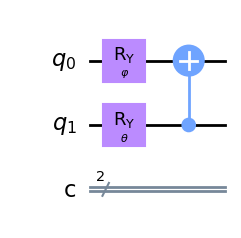

In [5]:
from qiskit.circuit import Parameter
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Statevector
import math

phi = Parameter('$\\varphi$')
theta = Parameter('$\\theta$')

bundle_a = {phi: math.pi/2, theta: 0}
bundle_b = {phi: 0, theta: math.pi/2}

qc = QuantumCircuit(2,2)
qc.ry(phi, 0)
qc.ry(theta, 1)
qc.cx(1,0)

display(qc.draw(output='mpl'))

qc = qc.bind_parameters(bundle_a)

## Exercise 3.4 - Deutsch-Jozsa algorithm



Implement the Deutsch-Josza algorithm for oracles $U_f$ implementing a function $f:\{0,1\}^2\rightarrow\{0,1\}$. Test the circuit with oracles representing
* the constant function $f(00)=f(01)=f(10)=f(11)=1\,$,
* the balanced function $f(00)=f(01)=0,\,f(10)=f(11)=1\,$.

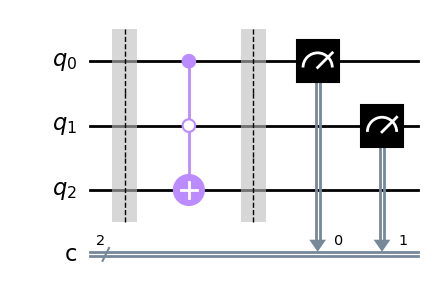

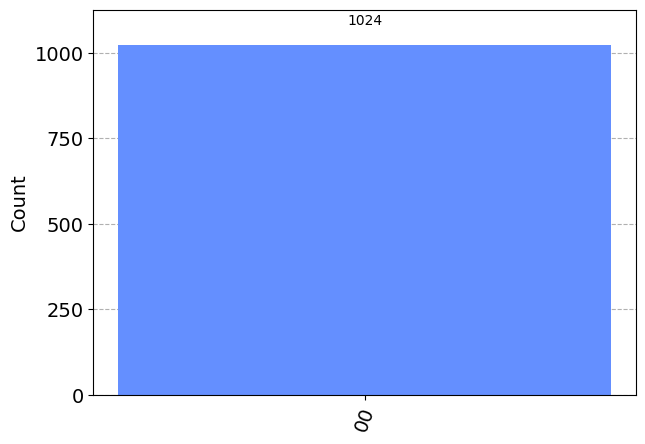

In [6]:
from qiskit.circuit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.compiler import transpile
from qiskit.visualization import plot_histogram

def oracle(qc):
    qc.ccx(0,1,2,'01') # toffoli gate, X on q_2 iff q_0==1 and q_1==0

qc = QuantumCircuit(3,2)

##########################
# add preprocessing here #
##########################

qc.barrier()
oracle(qc)
qc.barrier()

###########################
# add postprocessing here #
###########################

qc.measure([0,1], [0,1])
display(qc.draw(output='mpl'))

backend = AerSimulator(shots=1024)
job = backend.run(transpile(qc, backend))
result = job.result()
counts = result.get_counts()
display(plot_histogram(counts))

## Exercise 3.5 - Modified Deutsch-Jozsa algorithm

__Warning__: This exercise is complicated, but an opportunity to fully understand the Deutsch-Jozsa algorithm..

For $f:\{0,1\}^2\rightarrow\{0,1\}$ we define classifier $c_f:=f(00)+f(01)+(1-f(10))+(1-f(11))\,$. We consider functions with $c_f$ being even. Modify the Deutsch-Jozsa algorithm to distinguish the following classes:
* $C_0:=\{f:c_f=0\text{ or }c_f=4\}\,$,
* $C_1:=\{f:c_f=2\}\,$.